In [1]:

from utils.video_tools import get_frames
from utils.yolo.MyYOLO import YOLODetector
from detect_region import DetectRegions
from detect_periodic import *

# Step1: 读取视频车流

In [2]:
#初始化读取器（yolo配置， 区域配置）
reader = TrafficFlowReader(yolocfgfile='./utils/yolo/yoloconfig.ini', 
    regioncfgfile = '/home/adminroot/Desktop/Detection/confs/temp.conf', save_path = './timeseries/')

In [3]:
t0 = reader.getTrafficFlow('/home/adminroot/Desktop/Detection/videos/t1.mp4')#获取车流
reader.ts2csv(t0, 't0.csv')#存储到csv

self yolocfg  ./utils/yolo/yoloconfig.ini
no frame


# Step2： 配置拥堵检测器

In [4]:
detector = CongestionDetector('/home/adminroot/Desktop/Detection/timeseries/ts30.csv', 25)

period,frespike [[1.28571429e+02 1.46911082e-01]
 [3.00000000e+02 9.97256508e-02]
 [6.42857143e+01 9.07718094e-02]
 [8.18181818e+01 7.44365356e-02]
 [1.80000000e+02 5.78259367e-02]
 [5.29411765e+01 2.90872628e-02]
 [4.50000000e+01 2.43533742e-02]
 [3.91304348e+01 2.21518668e-02]]


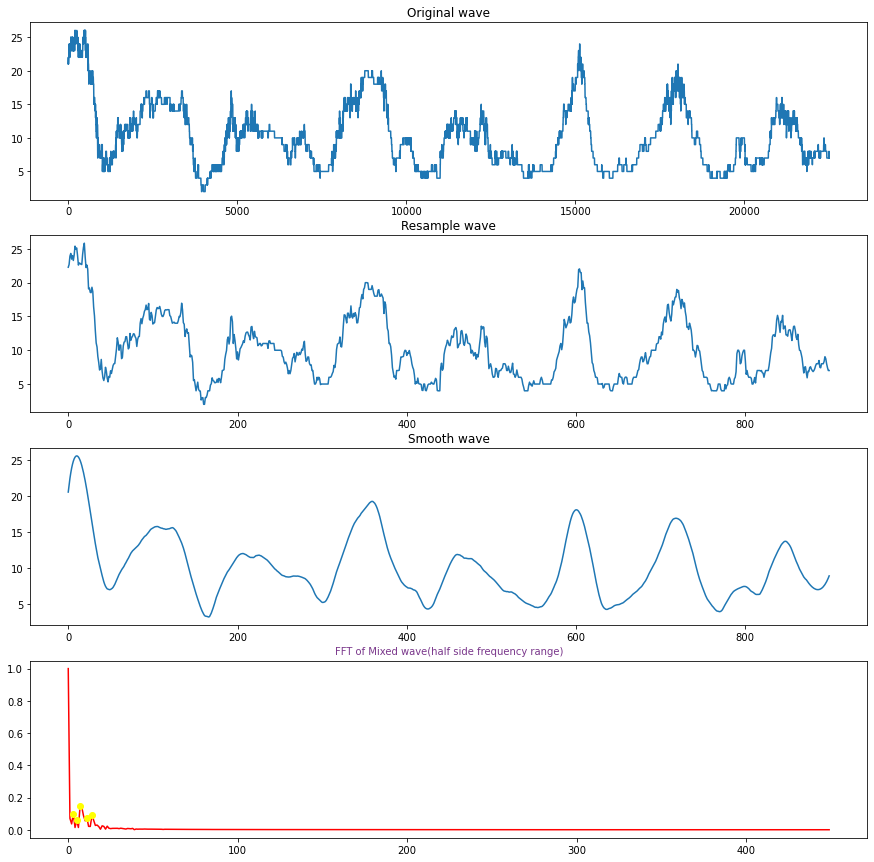

In [5]:
detector.visualize()

# Step3： 检测拥堵

## 测试不拥堵视频（15min）

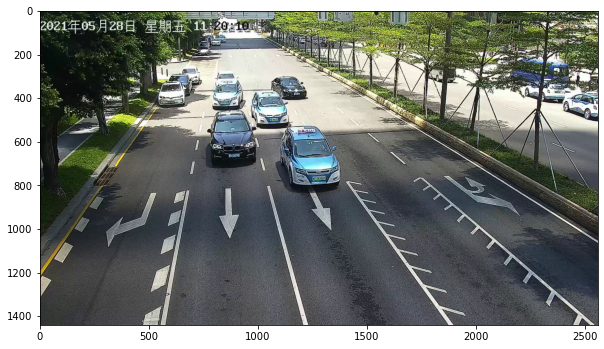

In [6]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con6.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [7]:
congestion = detector.main('/home/adminroot/Desktop/Detection/timeseries/ts30.csv')
print(congestion)

该路段畅通
None


## 测试拥堵视频（15mins）

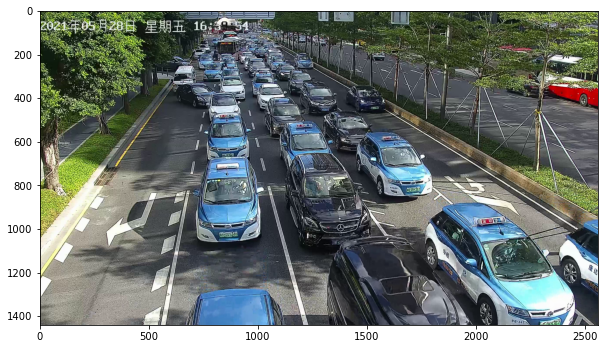

In [8]:
temp = plt.imread('/home/adminroot/Desktop/Detection/confs/con7.png')
plt.figure(figsize=(10,10))
plt.imshow(temp)

In [9]:
congestion = detector.main('/home/adminroot/Desktop/Detection/timeseries/ts31.csv')
print(congestion)

该路段拥堵
[[21.56, 22.4, 21.56, 21.12, 22.84, 22.4, 22.44, 23.24, 22.32, 21.68, 23.72, 24.28, 23.04, 21.92, 24.36, 23.92, 23.24, 21.84, 23.68, 24.88, 25.52, 25.12, 26.16, 26.2, 26.04, 24.88, 27.68, 26.96, 23.72, 25.08, 26.0, 24.32, 25.04, 25.56, 24.2, 23.72, 26.04, 25.4, 25.0, 23.8, 26.16, 26.28, 25.84, 24.88, 26.96, 25.64, 27.6, 27.92, 27.92, 28.0, 27.56, 27.72, 27.56, 27.52, 27.84, 27.88, 26.52, 26.68, 26.36, 26.64, 26.96, 26.84, 26.92, 26.76, 26.48, 26.8, 26.96, 27.04, 27.0, 27.12, 27.04, 27.44, 28.4, 28.16, 26.8, 27.4, 27.88, 26.8, 27.16, 26.88, 26.76, 27.0, 27.84, 27.68, 29.04, 27.36, 27.28, 26.2, 27.88, 27.44, 27.04, 26.24, 29.0, 28.12, 28.48, 28.92, 29.44, 29.32, 28.36, 28.0, 29.64, 29.84, 30.0, 29.84, 26.36, 26.04, 26.88, 25.8, 26.52, 27.8, 26.2, 25.56, 26.12, 26.08, 25.56, 25.64, 25.32, 24.92, 25.48, 25.16, 25.72, 25.88, 25.36, 25.0, 24.68, 24.2, 26.12, 26.16, 26.24, 25.6, 25.96, 26.0, 25.68, 25.64, 27.0, 26.48, 26.28, 26.08, 26.96, 26.6, 27.12, 26.04, 27.24, 26.0, 25.96, 25.24, 2

## 测试拥堵转流畅视频（15mins）

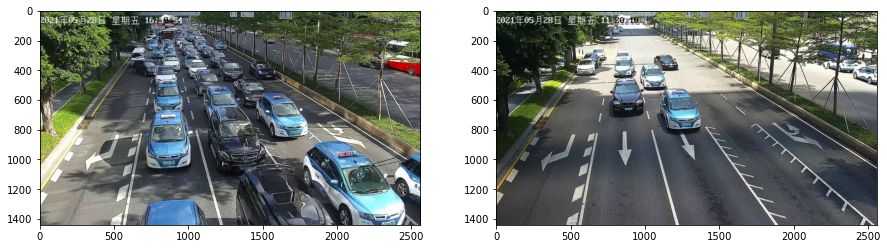

In [11]:
temp1 = plt.imread('/home/adminroot/Desktop/Detection/confs/con7.png')
temp2 = plt.imread('/home/adminroot/Desktop/Detection/confs/con6.png')

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(temp1)
plt.subplot(222)
plt.imshow(temp2)

In [12]:
congestion = detector.main('/home/adminroot/Desktop/Detection/timeseries/ts32.csv')
print(congestion)

该路段拥堵
[[21.04, 22.32, 22.68, 21.96, 22.6, 22.52, 22.36, 21.88, 22.84, 23.48, 24.0, 23.44, 22.88, 23.4, 24.08, 24.8, 25.76, 25.84, 26.88, 27.12, 27.16, 27.84, 27.32, 27.08, 26.52, 26.32, 28.24, 28.2, 28.32, 28.24, 27.24, 26.68, 27.04, 27.12, 28.16, 27.92, 28.08, 28.08, 28.4, 28.8, 29.76, 29.96, 27.64, 27.16, 29.88, 29.8, 29.36, 29.04, 28.76, 28.28, 27.48, 28.0, 27.56, 27.24, 28.84, 29.0, 28.16, 27.96, 28.64, 28.48, 28.56, 28.4, 27.36, 25.96, 27.76, 28.88, 28.0, 28.0, 28.24, 28.12, 27.84, 28.52, 29.0, 28.88, 28.28, 29.12, 29.32, 28.96, 29.28, 29.0, 29.0, 28.48, 28.28, 28.28, 30.36, 31.0, 30.04, 29.92, 30.0, 29.68, 30.12, 29.04, 29.4, 29.08, 29.64, 30.0, 30.24, 29.8, 27.92, 27.48, 29.12, 28.28, 27.92, 28.24, 29.52, 29.6, 29.24, 29.96, 29.0, 29.12, 30.24, 30.24, 30.12, 30.6, 31.36, 30.72, 31.28, 31.0, 31.0, 30.84, 30.0, 30.0, 30.0, 30.04, 29.84, 30.24, 30.16, 30.36, 30.88, 30.68, 30.52, 30.32, 30.8, 30.28, 31.12, 31.92, 31.76, 31.84, 30.8, 32.32, 31.8, 31.36, 30.0, 29.64, 29.92, 30.24, 30.

In [8]:
t30 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts30.csv','count')

In [30]:
a = data_search(t30,20)

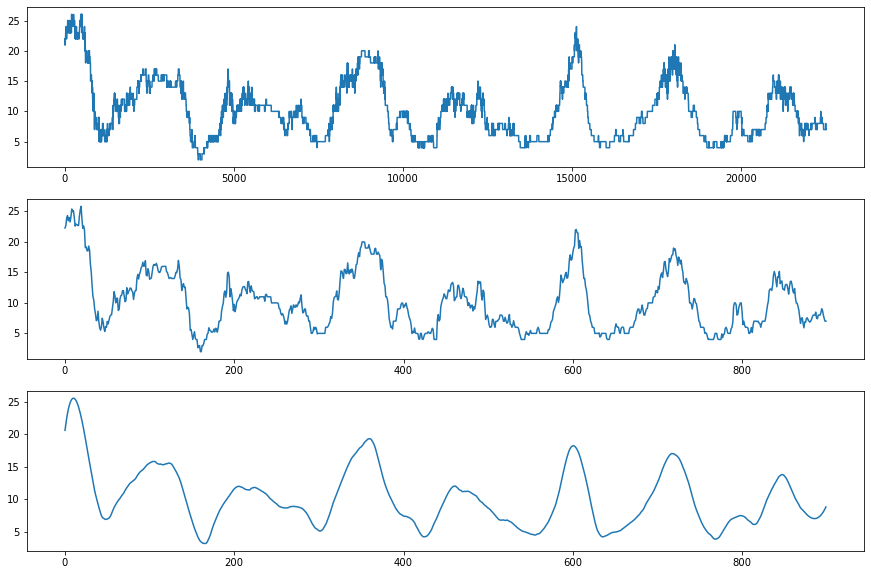

In [9]:
tmp = resample(t30, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t30)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)

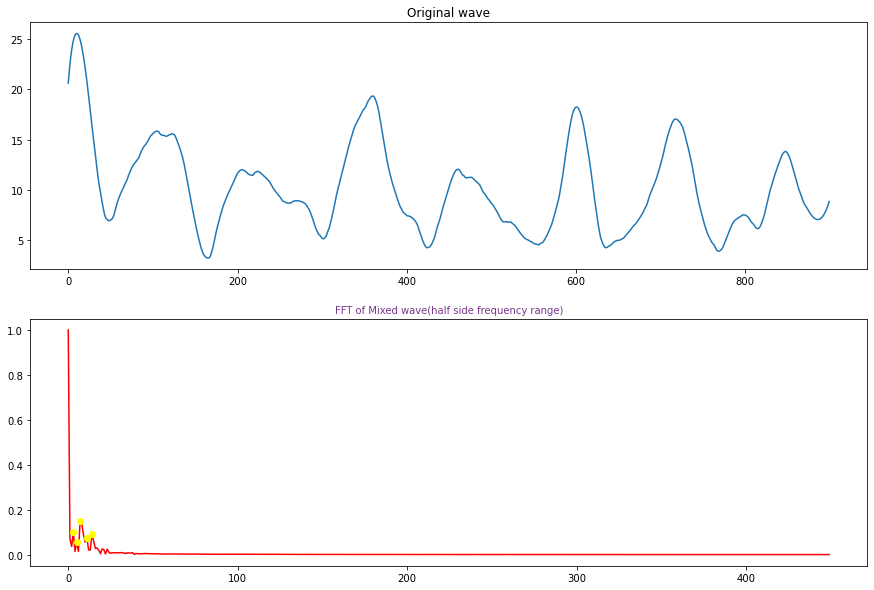

In [10]:
x,y = fftTransfer(tmp_smooth, 5, 0.01)

In [11]:
print('x',x)
print('y',y)

x [300.         180.         128.57142857  81.81818182  64.28571429
  52.94117647  45.          39.13043478]
y [0.0995797  0.05776179 0.14743955 0.07460548 0.0919549  0.02949225
 0.02517636 0.02419197]


/home/adminroot/Desktop/Detection/detect_periodic.py:131: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(timeseries, model='additive', freq =frequence)


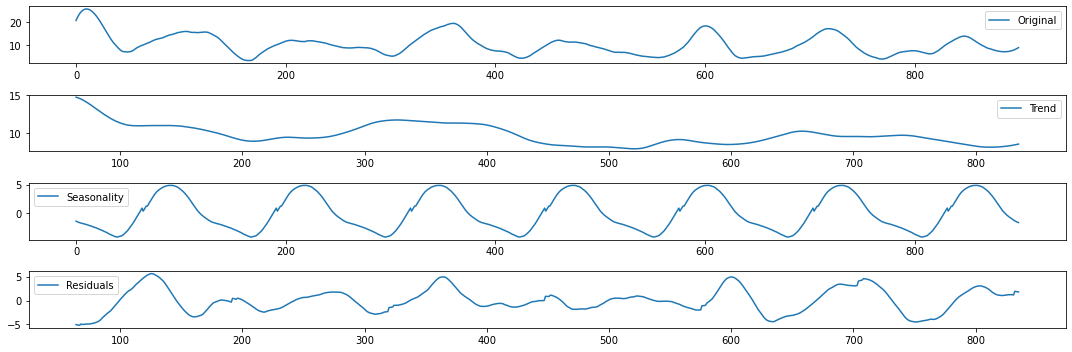

In [101]:
t, s, r = decompose(tmp_smooth, 128)

## 拥堵

In [7]:
t31 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts31.csv','count')

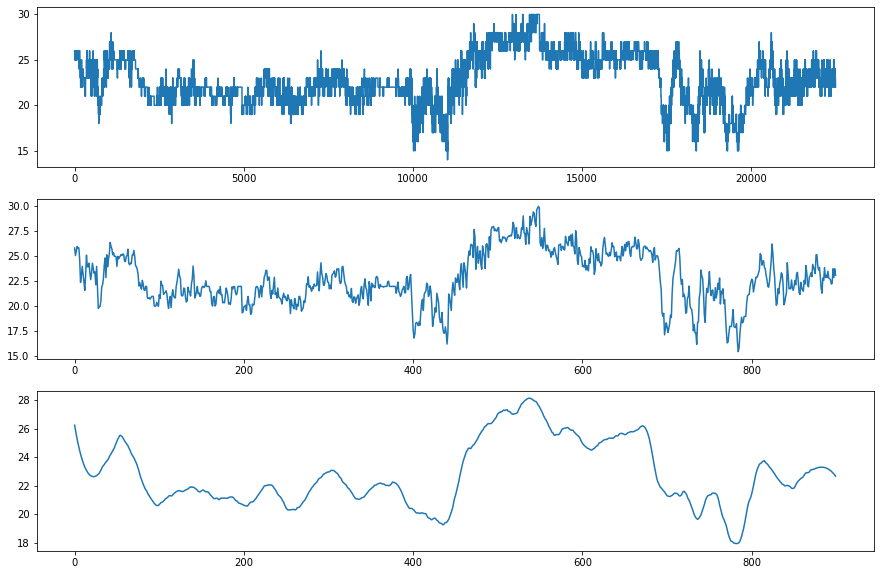

In [8]:
tmp = resample(t31, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t31)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)

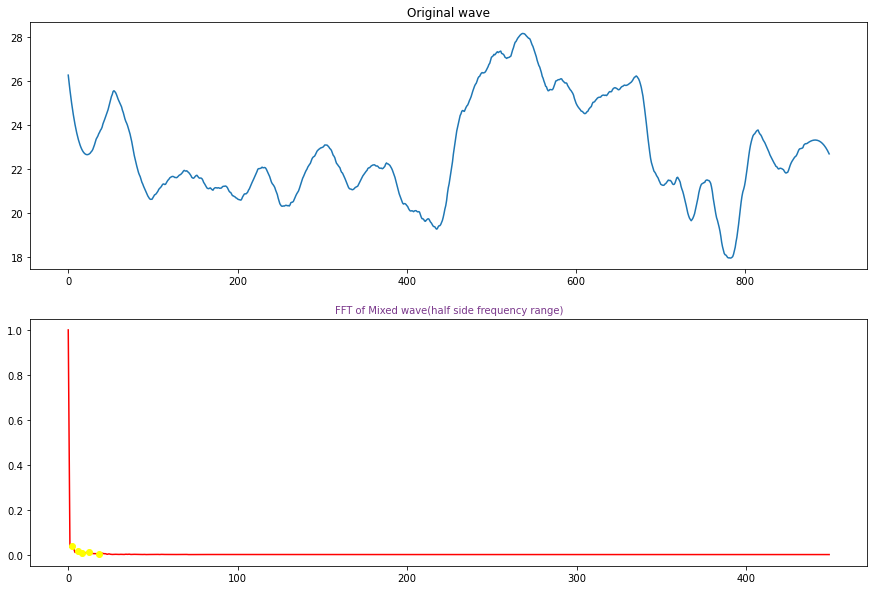

In [9]:
x,y = fftTransfer(tmp_smooth, 5, 0.01)

In [10]:
print('x',x)
print('y',y)

x [450.  150.  112.5]
y [0.03944045 0.01782107 0.0122915 ]


/home/adminroot/Desktop/Detection/detect_periodic.py:131: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(timeseries, model='additive', freq =frequence)


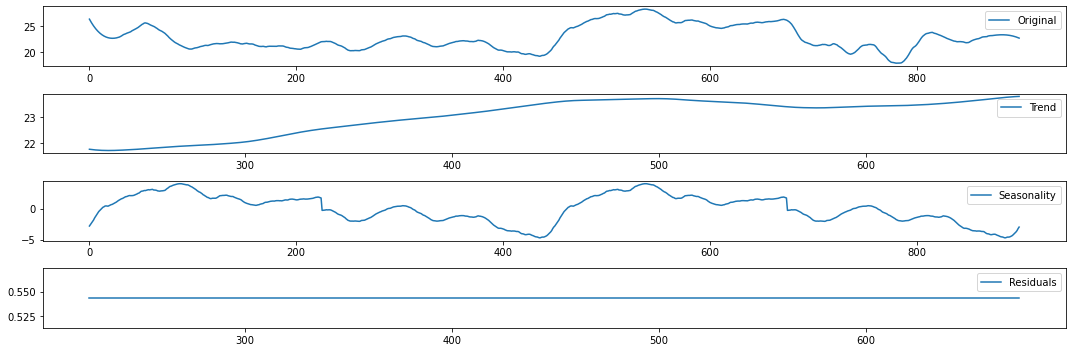

In [107]:
t, s, r = decompose(tmp_smooth, 450)

## 拥堵转不堵

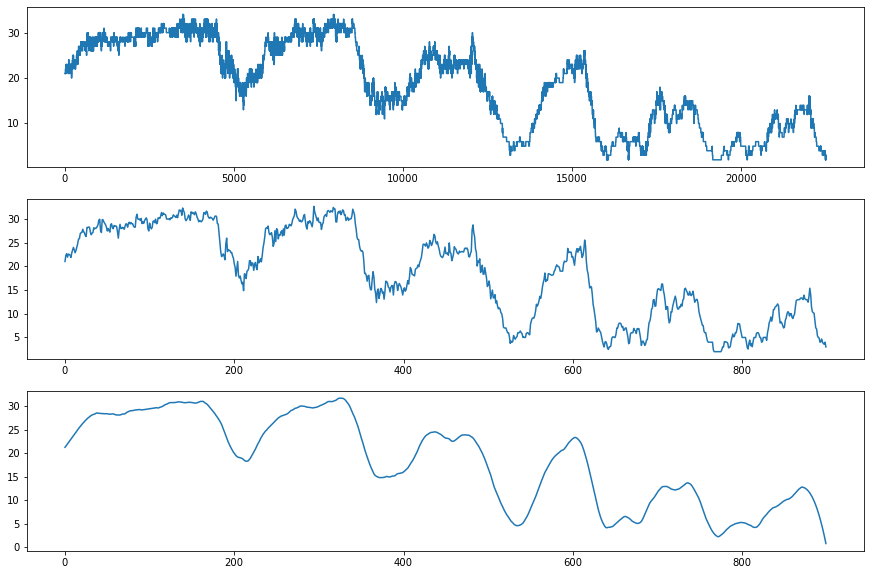

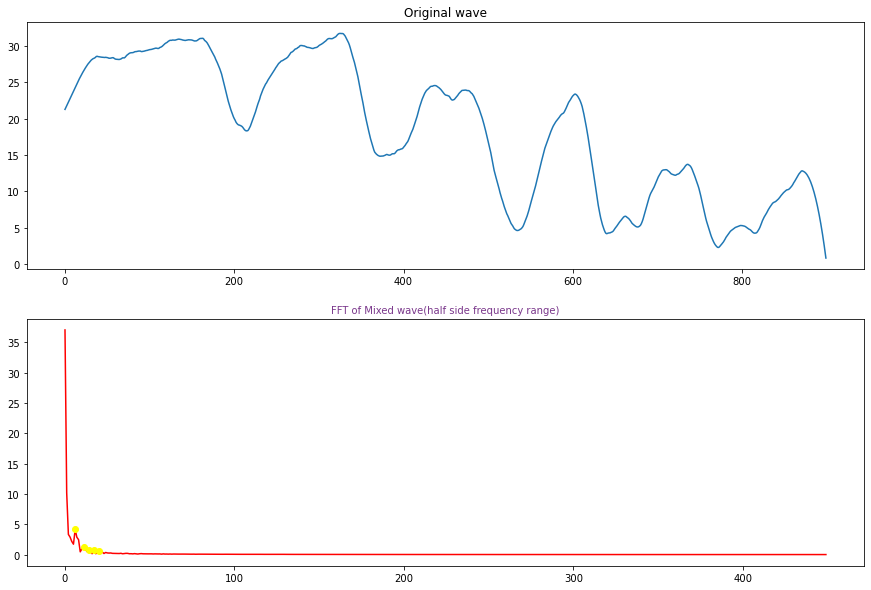

In [6]:
t32 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts32.csv','count')
tmp = resample(t32, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t32)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)
x,y = fftTransfer(tmp_smooth, 5, 0.5)

In [112]:
print('x',x)
print('y',y)

x [150.          81.81818182  64.28571429  52.94117647  45.        ]
y [4.16103797 1.23528335 0.78377916 0.74210966 0.66970455]


/home/adminroot/Desktop/Detection/detect_periodic.py:131: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(timeseries, model='additive', freq =frequence)


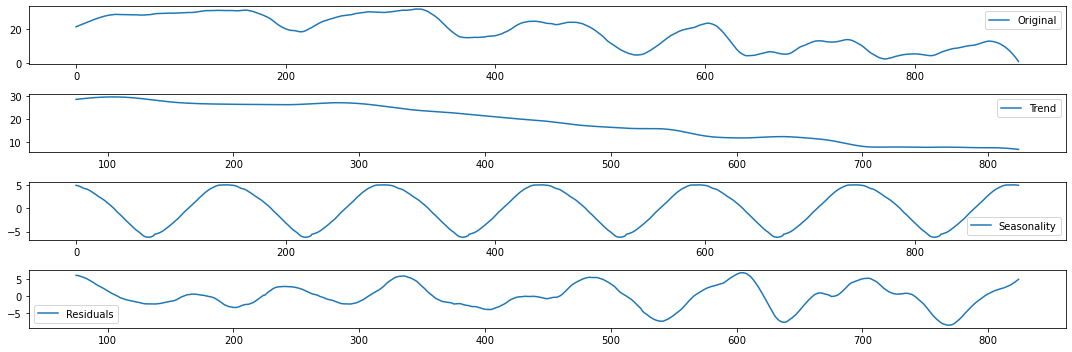

In [113]:
t, s, r = decompose(tmp_smooth, 150)

## t10

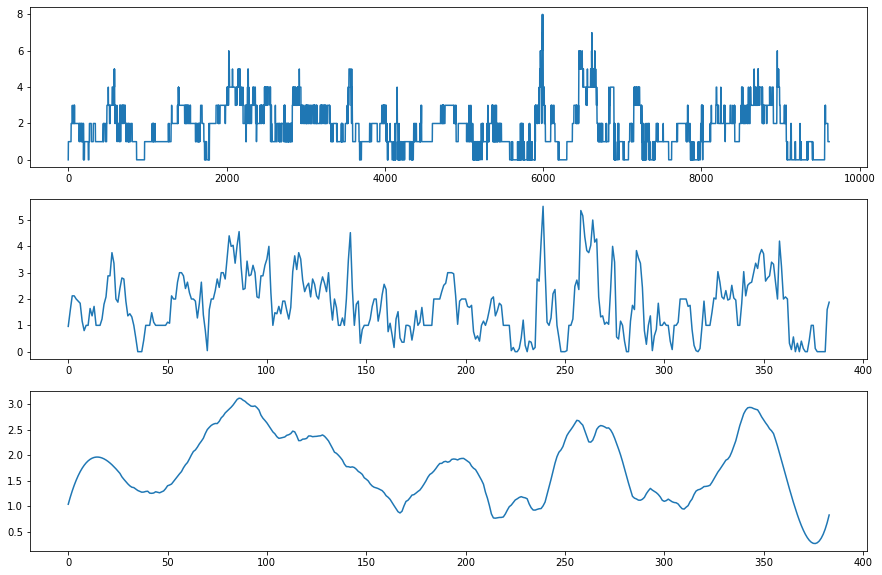

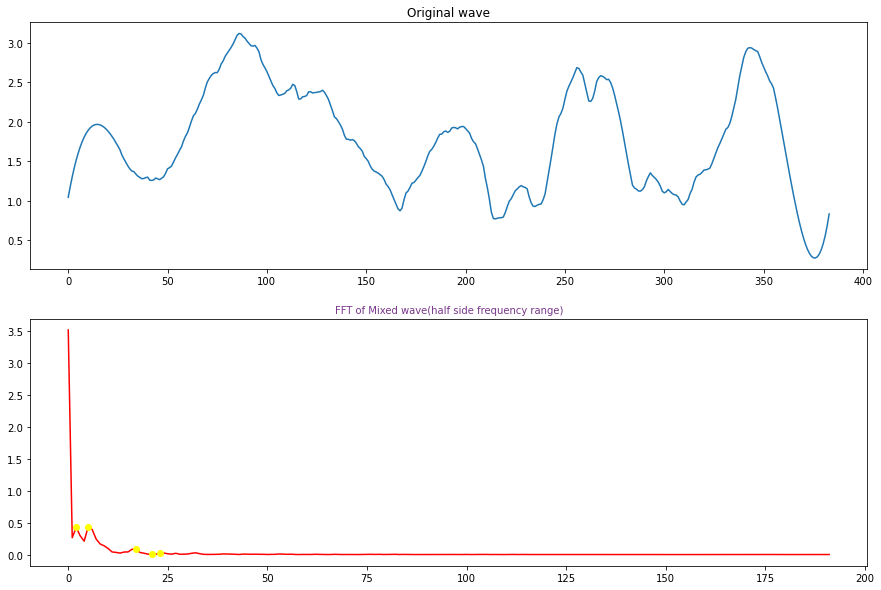

x [192.          76.8         22.58823529]
y [0.42549393 0.43496013 0.08670201]


In [9]:
t10 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts10.csv','count')
tmp = resample(t10, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t10)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)
x,y = fftTransfer(tmp_smooth, 5, 0.05)
print('x',x)
print('y',y)

/home/adminroot/Desktop/Detection/detect_periodic.py:131: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(timeseries, model='additive', freq =frequence)


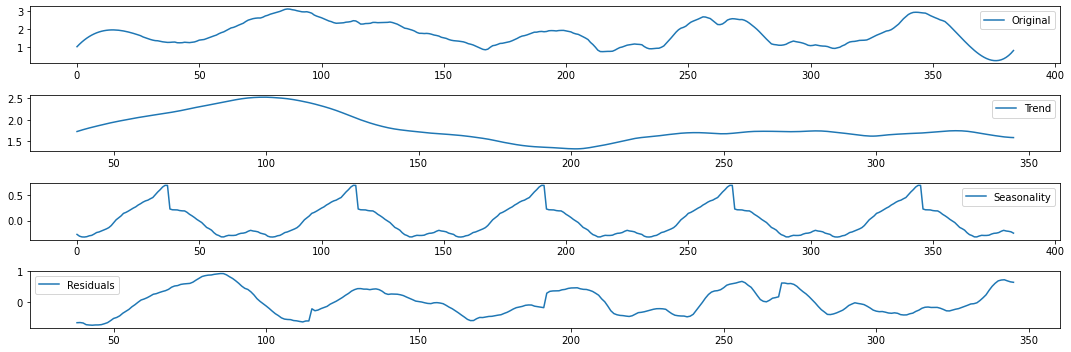

In [11]:
t, s, r = decompose(tmp_smooth, 77)

## 20

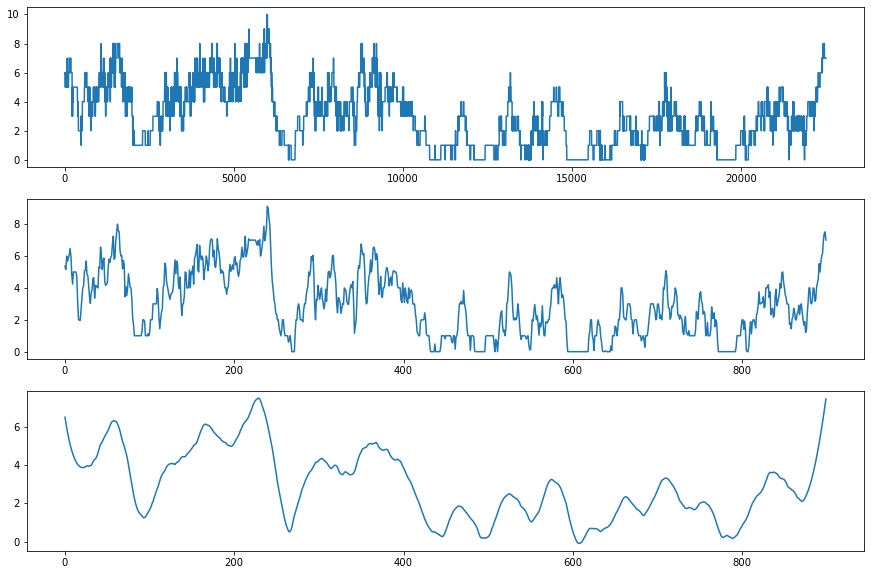

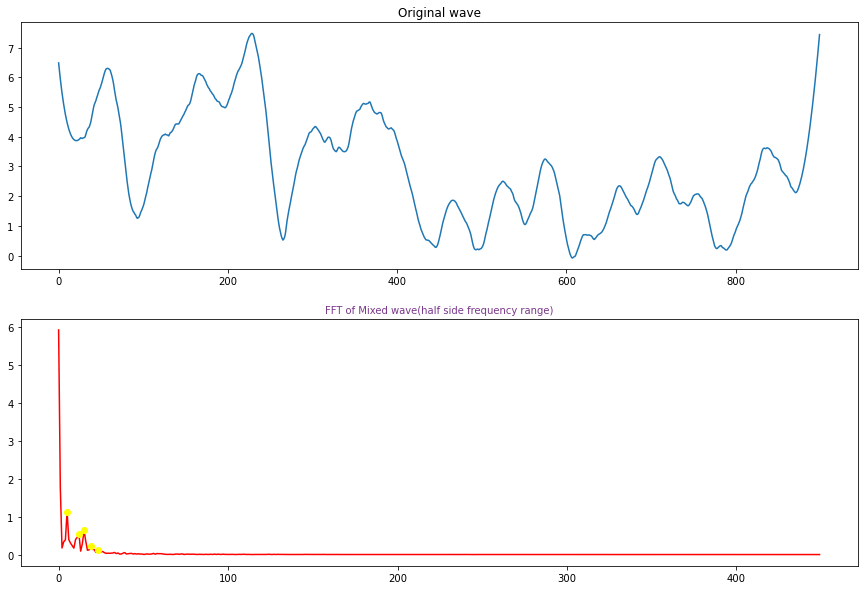

x [180.          75.          60.          47.36842105  39.13043478
  34.61538462  31.03448276  27.27272727]
y [1.1351578  0.53527229 0.64015084 0.22263959 0.11271285 0.08147913
 0.05631958 0.05300006]


In [20]:
t20 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts20.csv','count')
tmp = resample(t20, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t20)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)
x,y = fftTransfer(tmp_smooth, 5, 0.05)
print('x',x)
print('y',y)

/home/adminroot/Desktop/Detection/detect_periodic.py:131: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(timeseries, model='additive', freq =frequence)


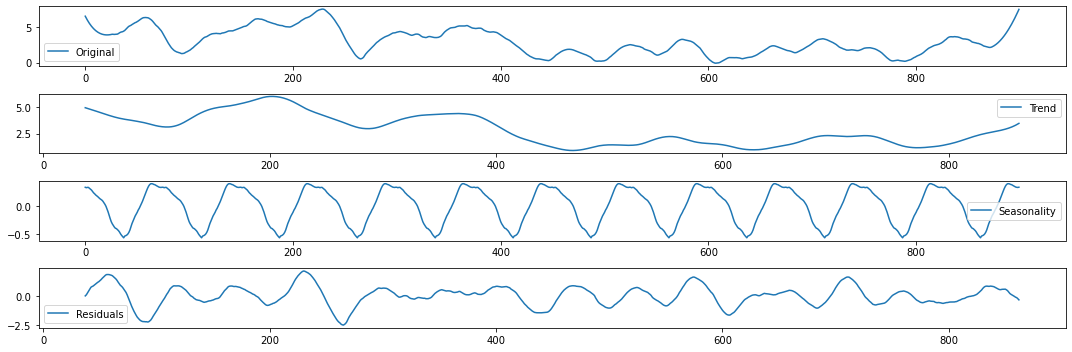

In [21]:
t, s, r = decompose(tmp_smooth, 75)

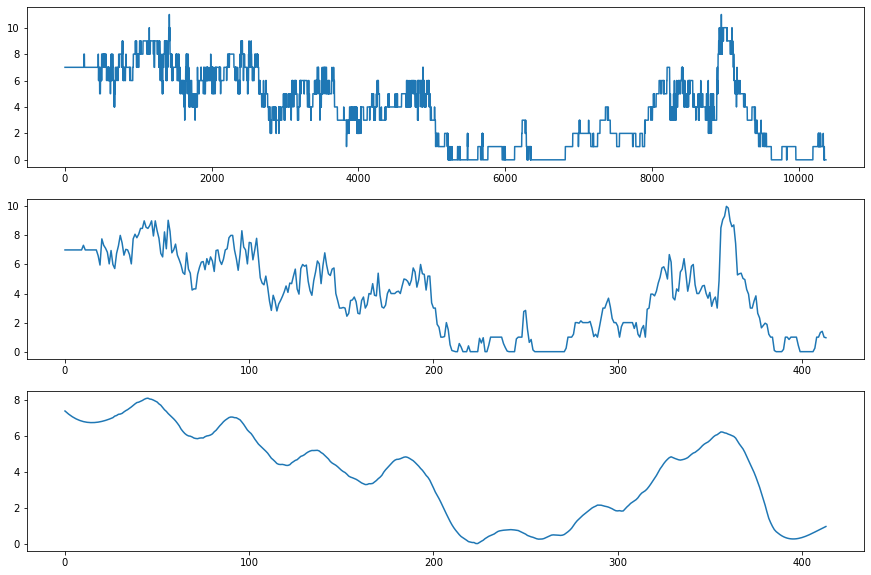

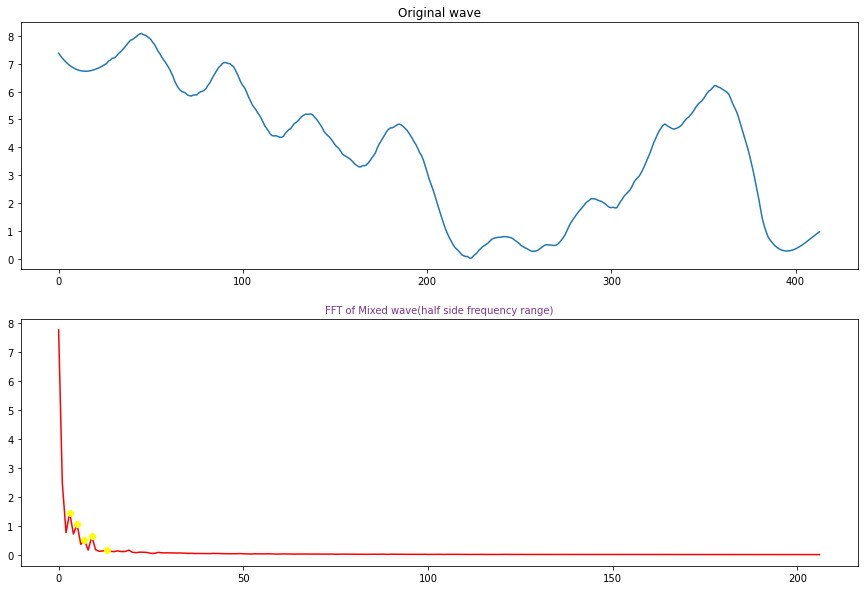

x [138.          82.8         59.14285714  46.          31.84615385
  25.875       21.78947368  18.81818182  15.33333333  12.54545455
  11.5         10.89473684   9.85714286]
y [1.46428592 1.05616687 0.51497017 0.64610409 0.16513312 0.14164379
 0.16898449 0.09825345 0.09037315 0.06962218 0.05750436 0.05307236
 0.05596212]


In [22]:
t21 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts21.csv','count')
tmp = resample(t21, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t21)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)
x,y = fftTransfer(tmp_smooth, 5, 0.05)
print('x',x)
print('y',y)

/home/adminroot/Desktop/Detection/detect_periodic.py:131: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(timeseries, model='additive', freq =frequence)


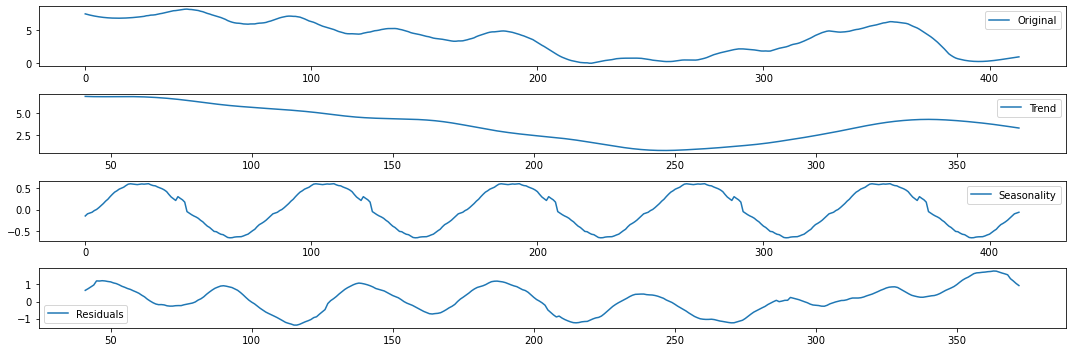

In [23]:
t, s, r = decompose(tmp_smooth, 82)

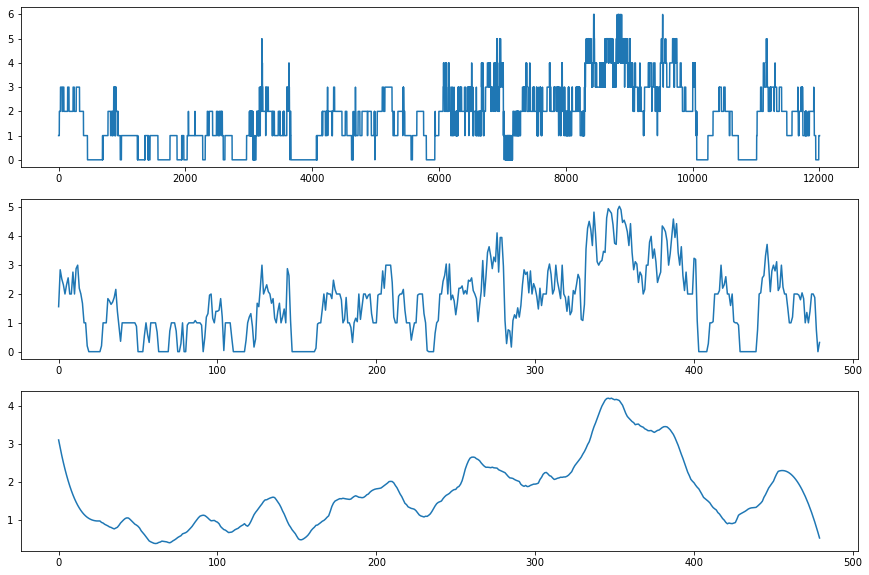

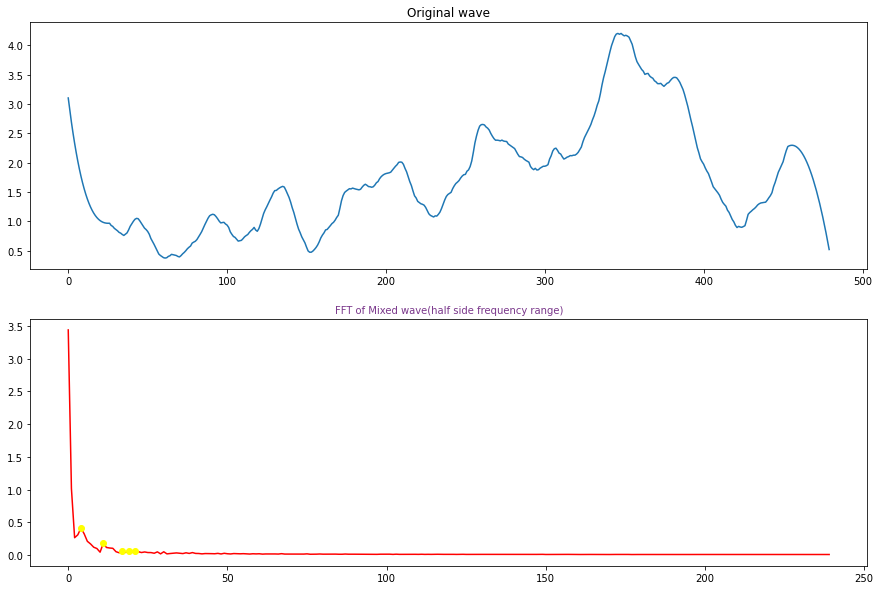

x [120.          43.63636364  28.23529412  25.26315789  22.85714286]
y [0.41064843 0.17644202 0.05258423 0.0654167  0.05245783]


In [24]:
t10 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts10.csv','count')
tmp = resample(t10, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t10)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)
x,y = fftTransfer(tmp_smooth, 5, 0.05)
print('x',x)
print('y',y)

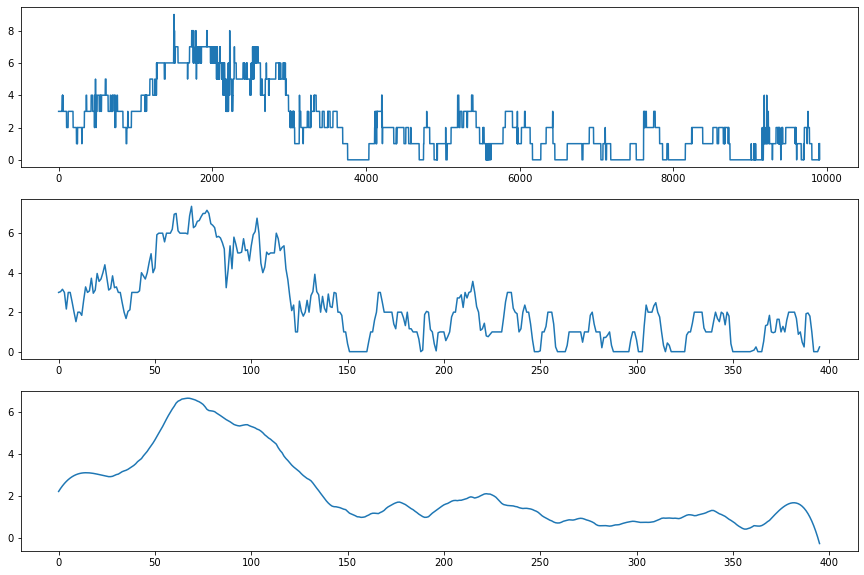

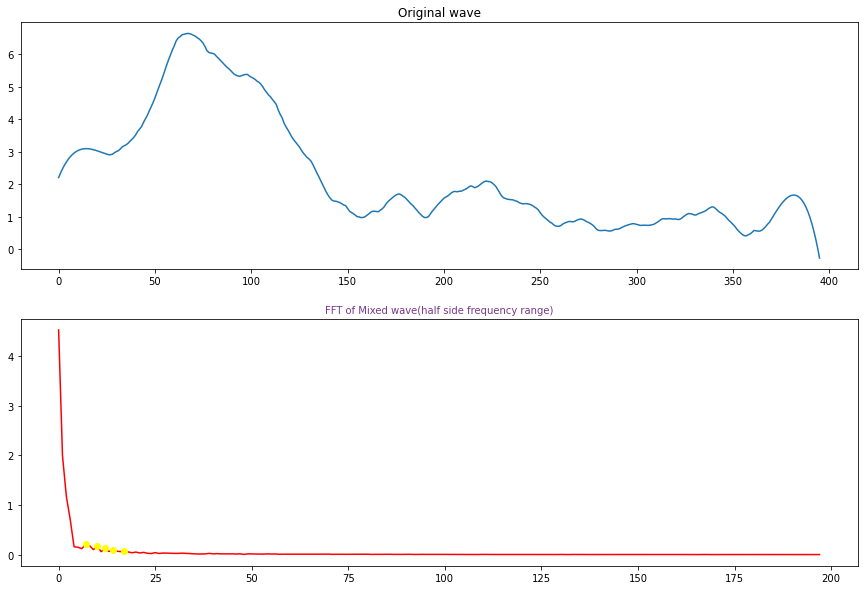

x [56.57142857 39.6        33.         28.28571429 23.29411765 19.8       ]
y [0.21308049 0.17464824 0.12963399 0.09462328 0.08580568 0.05611913]


In [25]:
t11 = csv2ts('/home/adminroot/Desktop/Detection/timeseries/ts11.csv','count')
tmp = resample(t11, 25)
tmp_smooth = signal.savgol_filter(tmp,53,3)
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t11)
plt.subplot(312)
plt.plot(tmp)
plt.subplot(313)
plt.plot(tmp_smooth)
x,y = fftTransfer(tmp_smooth, 5, 0.05)
print('x',x)
print('y',y)

## 判断函数

In [ ]:
def main(video_path):
    